Importing the Necessary Libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

##importing all the necessary libraries for data manipulation, visualization, and machine learning.

Loading the data set

In [5]:
# Loading the dataset
df = pd.read_csv('balanced_dataset_50_50.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
       type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0  TRANSFER  129526.58  C1786736565           0.00            0.00   
1   CASH_IN  304210.97  C2138211913     6638620.67      6942831.64   
2  CASH_OUT   57905.63   C393598530         188.00            0.00   
3   CASH_IN   83102.70   C807731926     2274365.81      2357468.51   
4   PAYMENT   14341.19   C603392505      459181.00       444839.81   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  C1189777296      2103690.88      2233217.46      0.0  
1  C1766776273       513871.60       209660.63      0.0  
2   C769319919       611506.02       669411.65      0.0  
3   C322340400       122204.31        39101.61      0.0  
4  M1570710058            0.00            0.00      0.0  


EDA(Display Basic Information and Summary Statistics)

In [6]:
# Display basic information about the dataset including data types, number of entries
print("\nBasic information about the dataset:")
print(df.info())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            5070 non-null   object 
 1   amount          5070 non-null   float64
 2   nameOrig        5070 non-null   object 
 3   oldbalanceOrg   5070 non-null   float64
 4   newbalanceOrig  5070 non-null   float64
 5   nameDest        5070 non-null   object 
 6   oldbalanceDest  5070 non-null   float64
 7   newbalanceDest  5070 non-null   float64
 8   isFraud         5070 non-null   float64
dtypes: float64(6), object(3)
memory usage: 356.6+ KB
None

Summary statistics of the dataset:
             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  5.070000e+03   5.070000e+03    5.070000e+03    5.070000e+03   
mean   7.305437e+05   1.087883e+06    4.523101e+05    7.786253e+05   
std    1.605670e+06   2.672994e+06    2.136752e+06    2.

Visualization of the Data set


Plotting histograms for all numerical features...


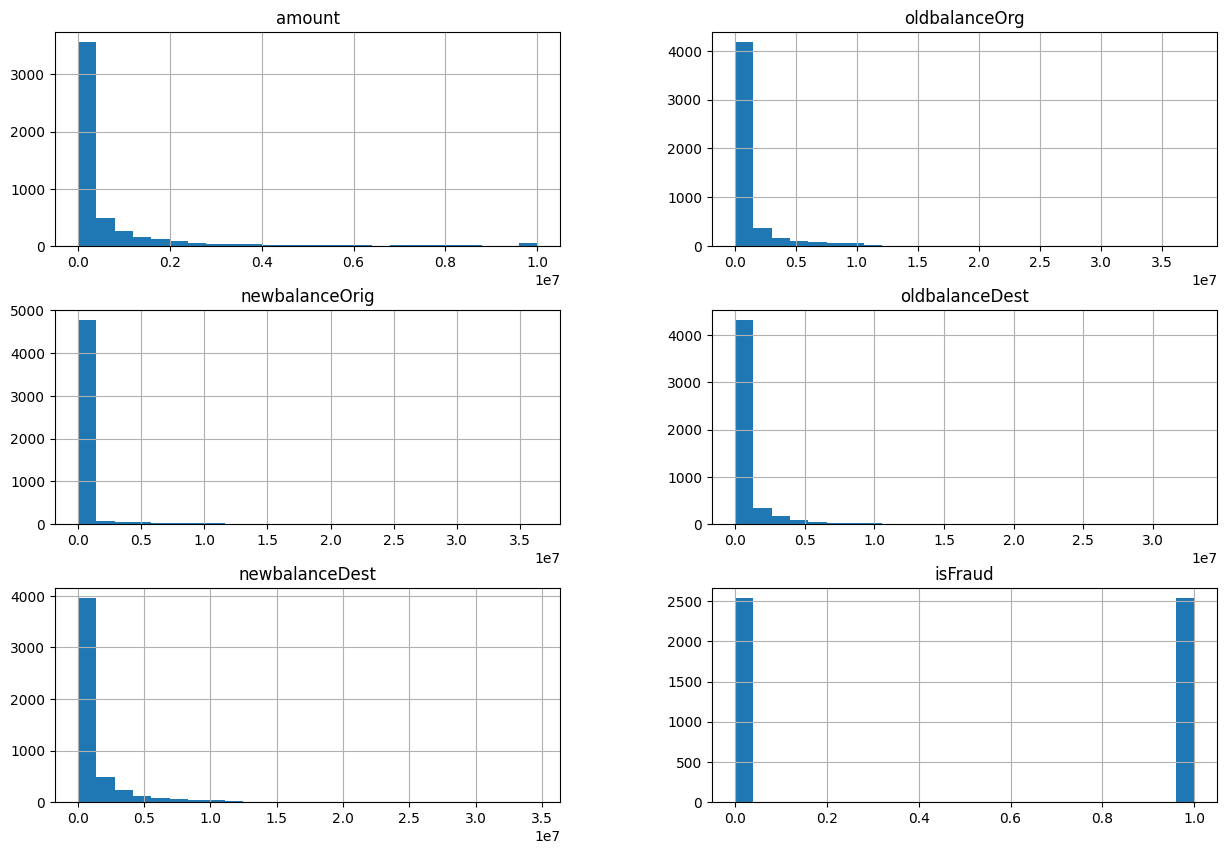

In [7]:
# Plot histograms for all numerical features to understand their distributions
print("\nPlotting histograms for all numerical features...")
df.hist(bins=25, figsize=(15, 10))
plt.show()
#The distribution plot of transaction amounts highlights the distribution for both fraudulent and non-fraudulent transactions.

From the Above feature Distribution we can see that ----->>>
1.Transaction Amount (amount): Most transactions have small amounts, but there are significant outliers with larger amounts, which could indicate potential fraud.

2.Original Balance of Sender (oldbalanceOrg):The majority of senders have low
initial balances, with a few high-balance outliers, indicating diverse financial profiles among users.

3.New Balance of Sender (newbalanceOrig):Similar to initial balances, most
senders maintain low balances post-transaction, with some high-balance outliers.

4,Original Balance of Receiver (oldbalanceDest):Most receivers have low initial balances, with a few high-balance outliers, suggesting a mix of small and large transactions.

5.New Balance of Receiver (newbalanceDest):Receivers generally maintain low balances after transactions, with some notable high-balance outliers.

6.Fraud Indicator (isFraud):The dataset is balanced, showing an equal number of fraudulent (1) and non-fraudulent (0) transactions, which is beneficial for model


Plotting correlation matrix...


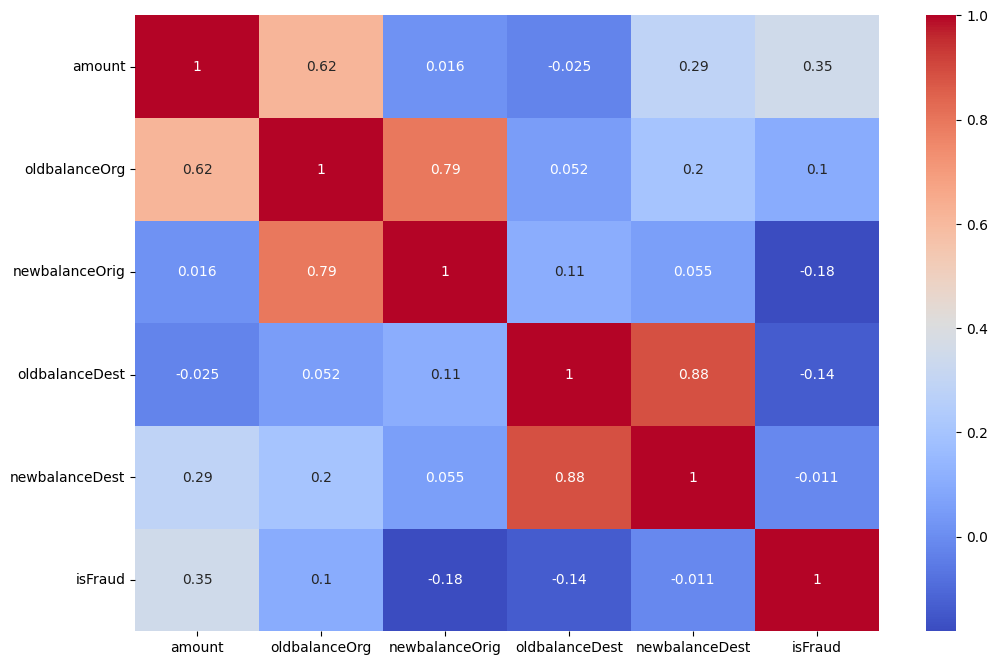

In [8]:
# Plot correlation matrix
print("\nPlotting correlation matrix...")
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
#The correlation matrix heatmap visualizes the relationships between numerical features

From the Above Correlation Matrix Plot we can derive that there are strong correlations between certain features such as oldbalanceOrg and newbalanceOrig, and oldbalanceDest and newbalanceDest. This multicollinearity suggests that these features may provide similar information and could be addressed through feature selection or engineering.


Plotting box plots for numerical features to check for outliers...


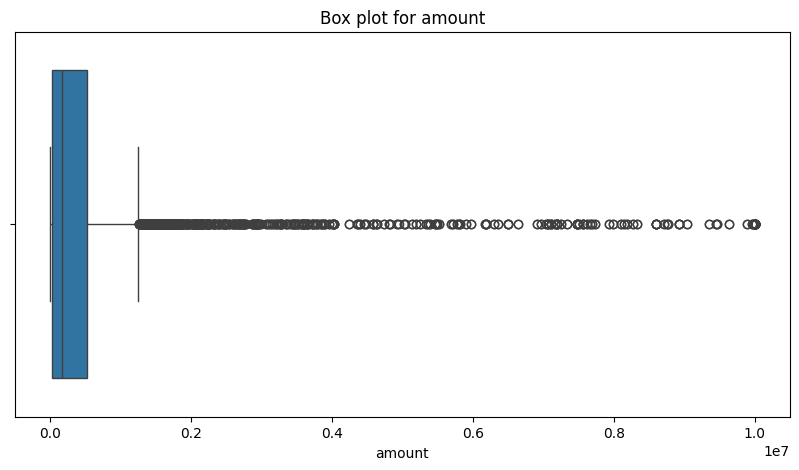

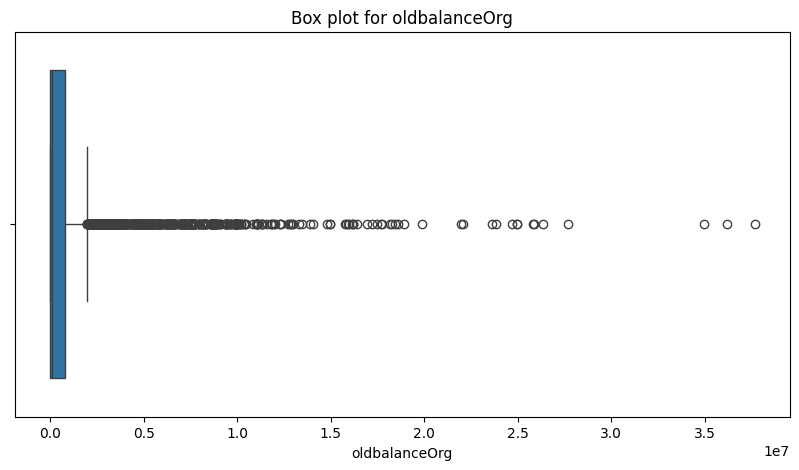

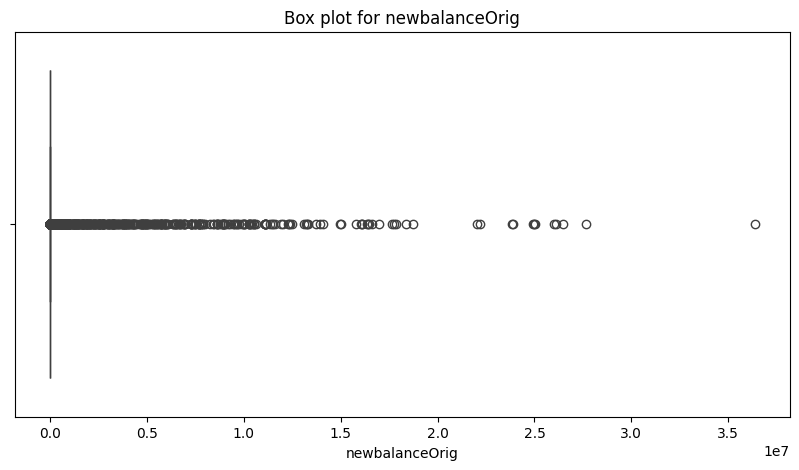

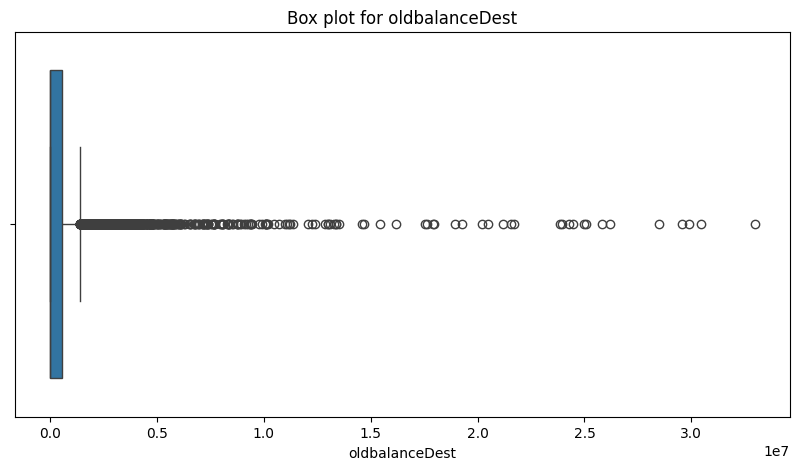

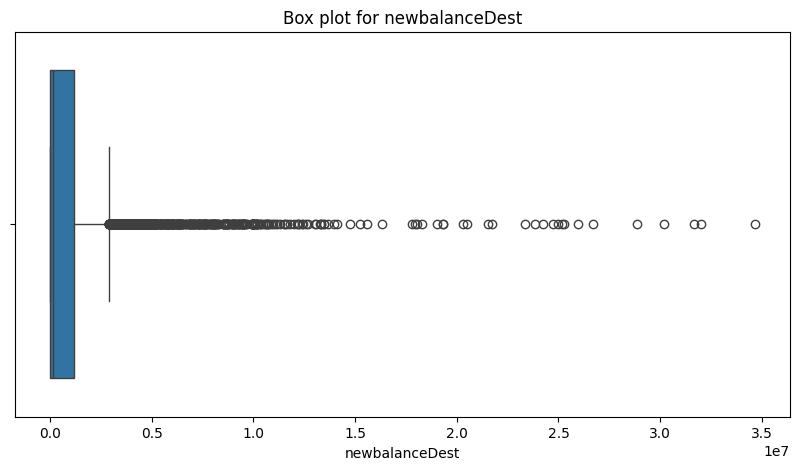

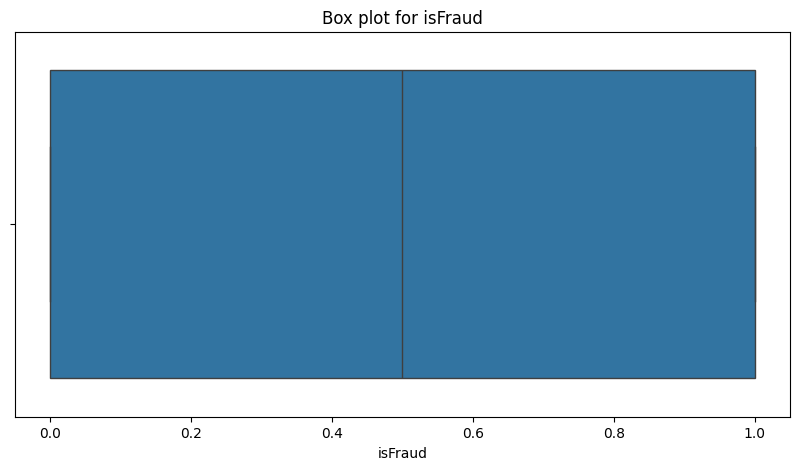

In [15]:
# Box plots for each numerical feature to check for outliers
print("\nPlotting box plots for numerical features to check for outliers...")
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()
#The box plot visualizes the distribution of transaction amounts for fraudulent and non-fraudulent transactions

From the Above Box plot we can derive that there are several outliers in the transaction amounts for both fraudulent and non-fraudulent transactions. Outliers may indicate unusual activity and should be carefully analyzed.


Plotting count of fraudulent vs non-fraudulent transactions...


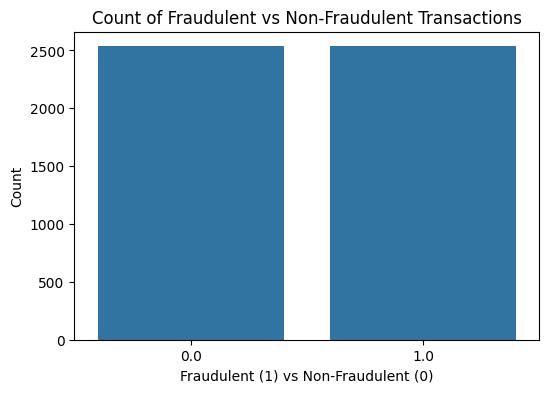

In [16]:
# Plotting count of fraudulent vs non-fraudulent transactions
print("\nPlotting count of fraudulent vs non-fraudulent transactions...")
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraudulent (1) vs Non-Fraudulent (0)')
plt.ylabel('Count')
plt.show()


Plotting pairplot for the dataset...


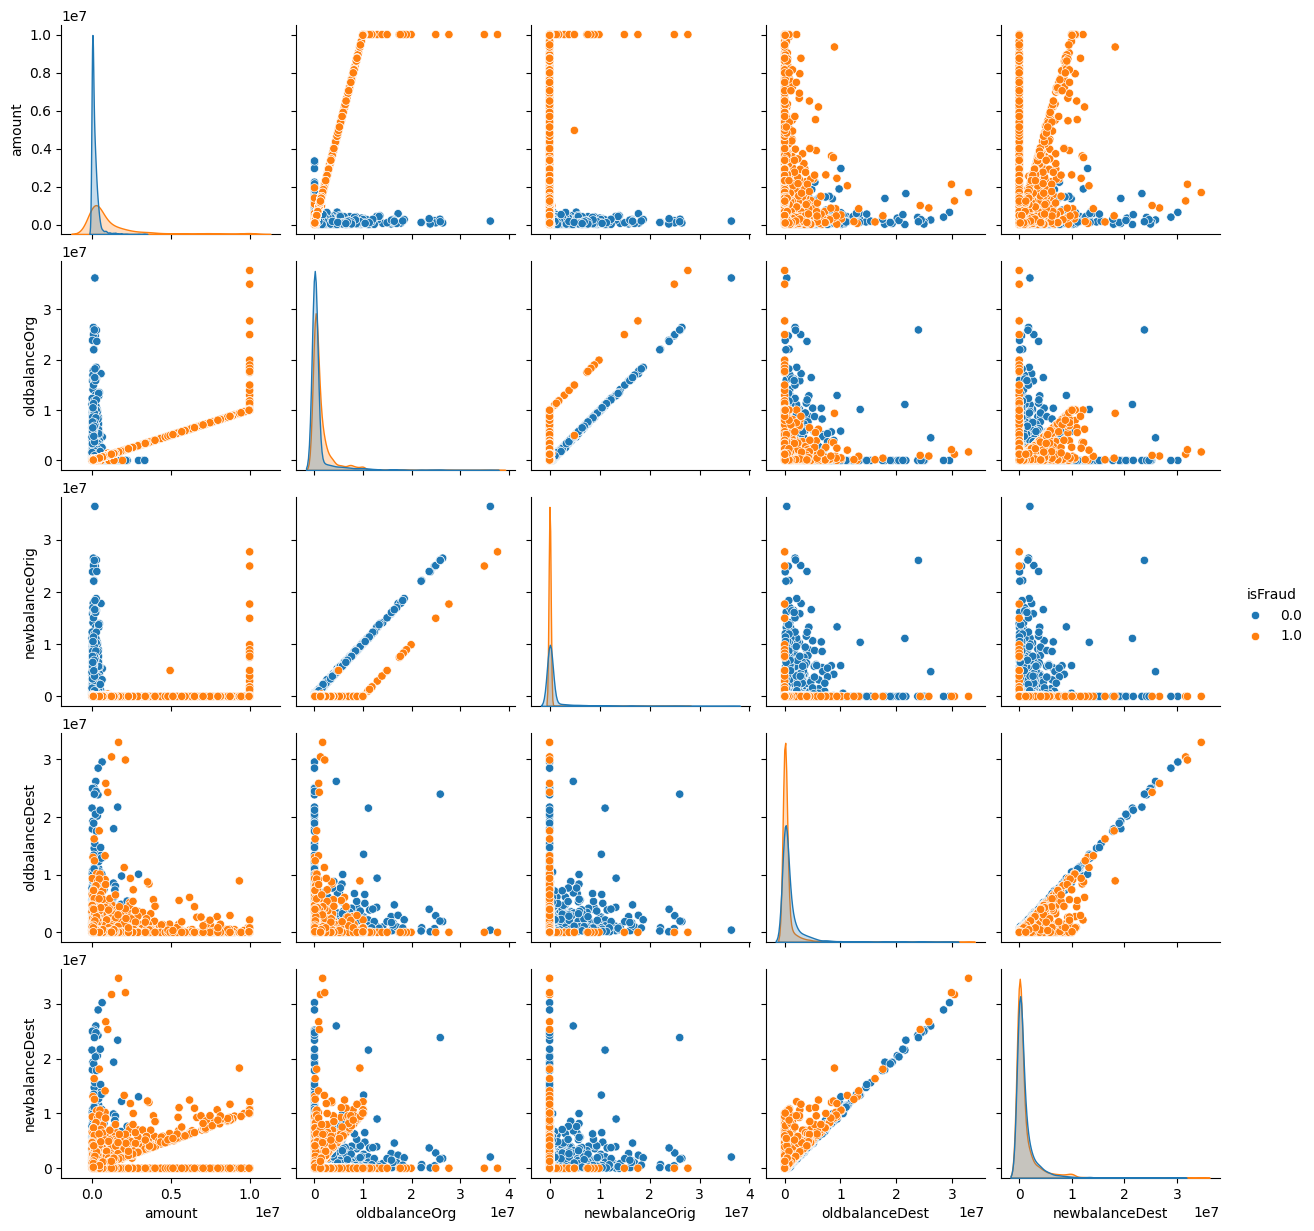

In [12]:
# Pairplot to visualize pairwise relationships
print("\nPlotting pairplot for the dataset...")
sns.pairplot(df, hue='isFraud')
plt.show()
#The bar plots visualize the distribution of categorical variables across fraudulent and non-fraudulent transactions.

From the Above Pair Plot we can derive that The relationships between certain features are visibly different for fraudulent vs non-fraudulent transactions. This suggests that interactions between features may be useful for identifying fraud.


Plotting bar plots for categorical variables...


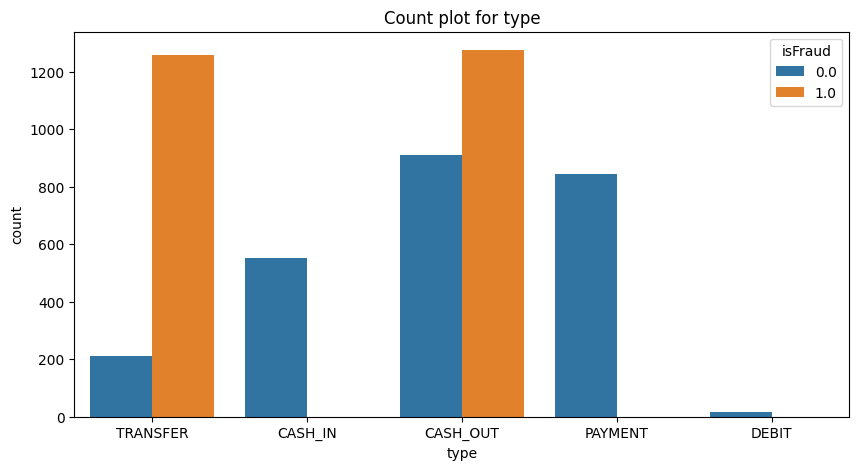

In [13]:
# Bar plots for categorical variables
print("\nPlotting bar plots for categorical variables...")
plt.figure(figsize=(10, 5))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Count plot for type')
plt.show()
#The bar plots visualize the distribution of categorical variables across fraudulent and non-fraudulent transactions.

From the Above Bar Plot we can derive that TRANSFER and CASH_OUT transactions are the most prone to fraud. These types show a high count of fraudulent transactions. On the other hand, CASH_IN, PAYMENT, and DEBIT transactions do not exhibit any fraudulent activity. This suggests that fraud detection efforts should be primarily focused on TRANSFER and CASH_OUT transaction types to effectively combat fraudulent activities.


Plotting distribution plots for numerical features...


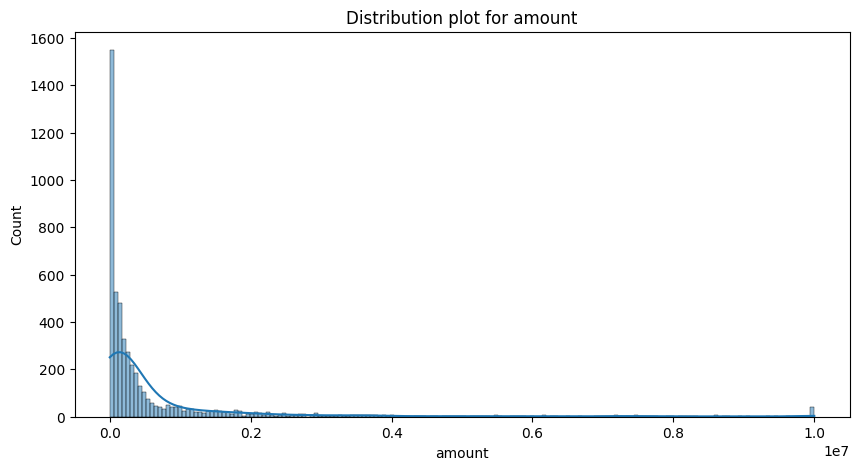

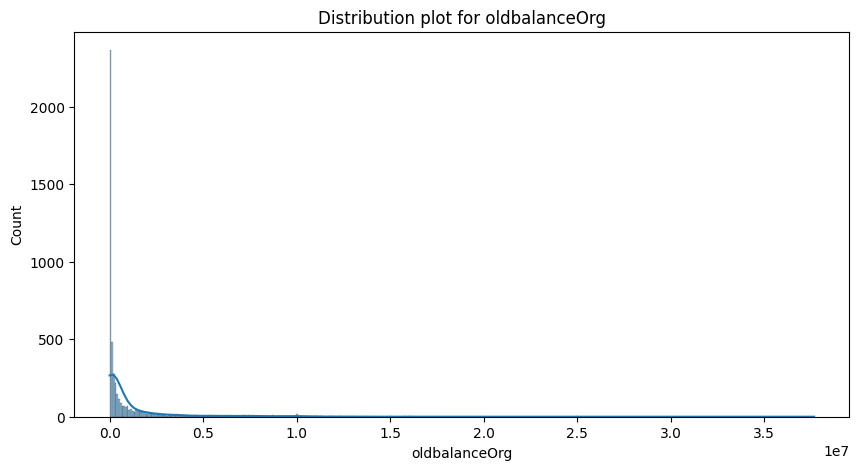

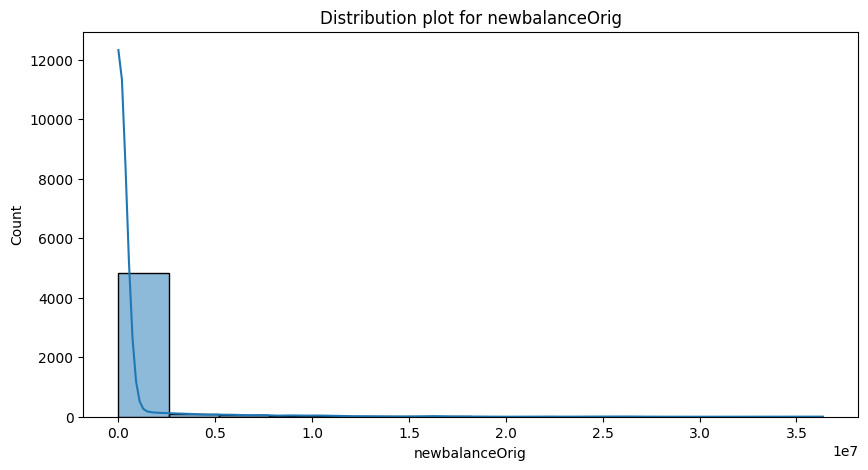

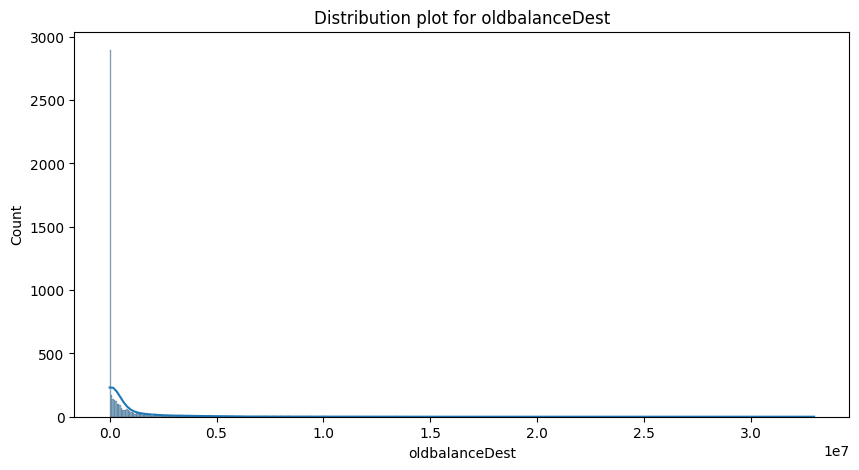

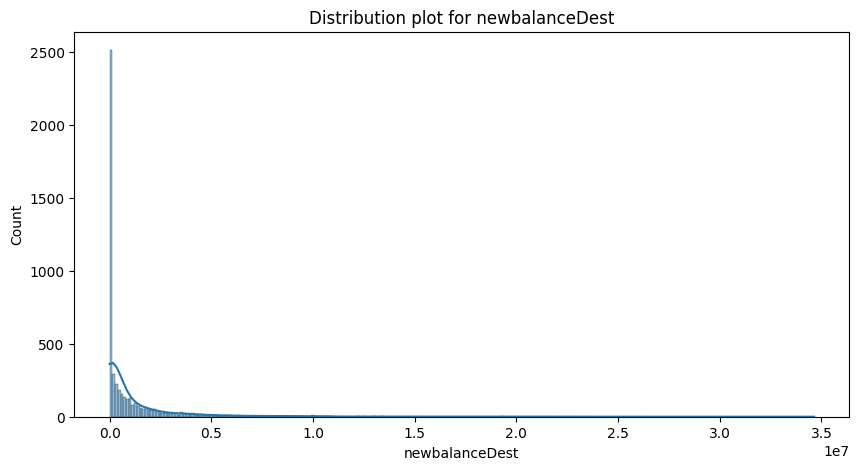

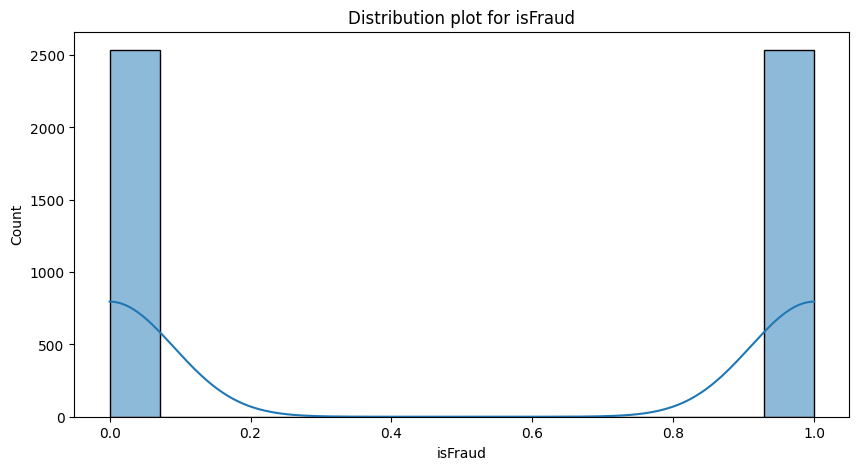

In [17]:
# Distribution plots for numerical features
print("\nPlotting distribution plots for numerical features...")
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution plot for {column}')
    plt.show()
#The distribution plots highlight the spread and central tendencies of numerical features

From the Above Distribution Plot we can derive that The distribution of certain numerical features differs significantly between fraudulent and non-fraudulent transactions. For example, fraudulent transactions may have distinct distributions for features like amount.


Plotting scatter plots for numerical features...


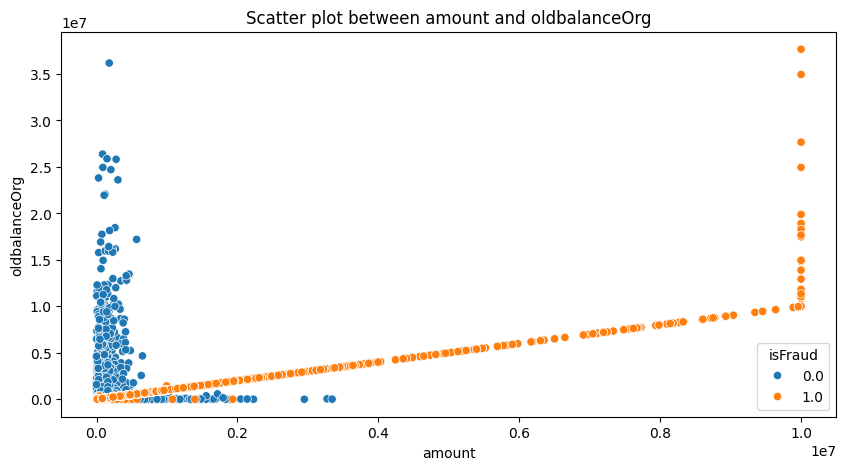

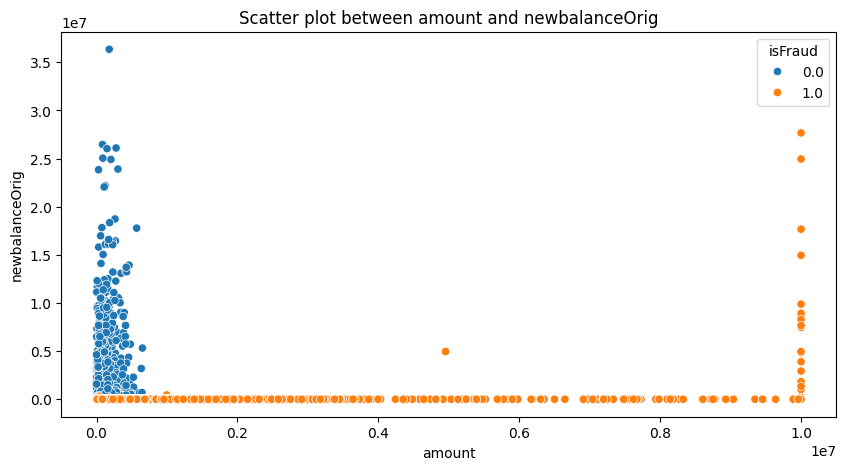

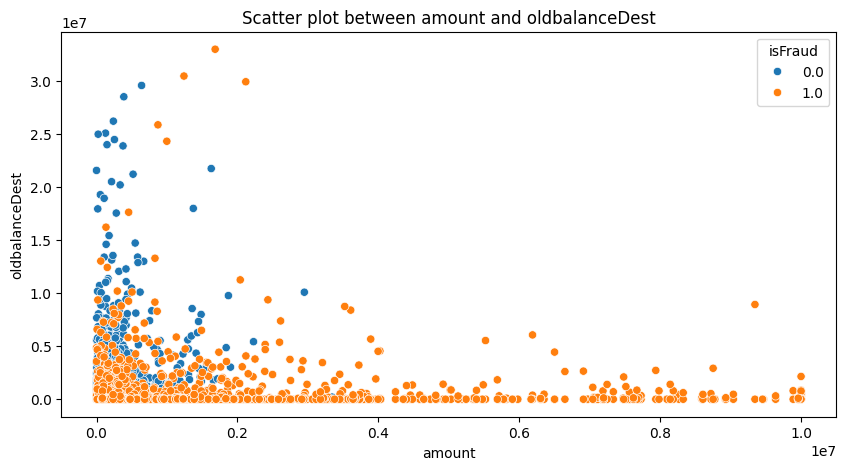

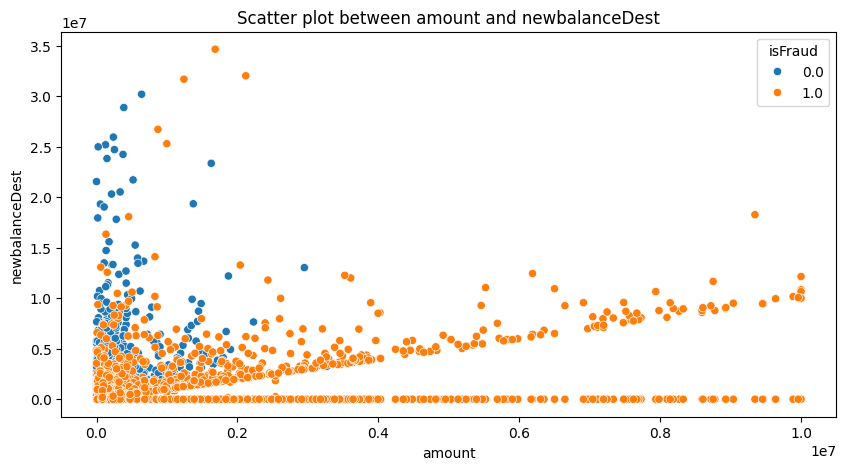

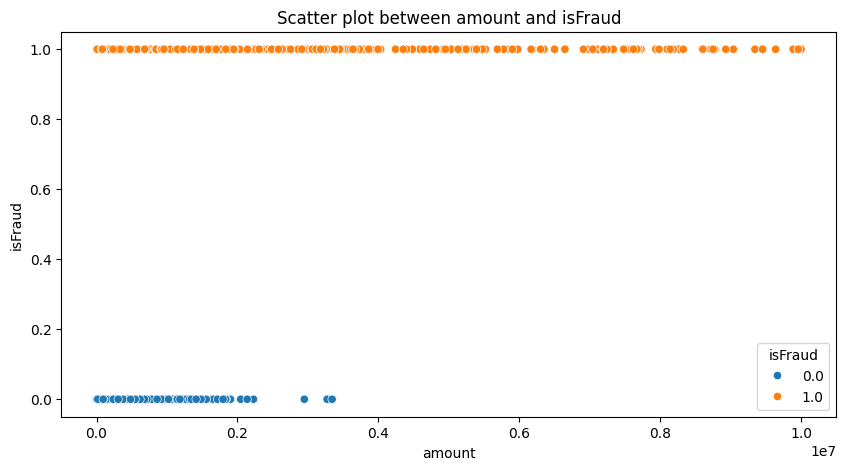

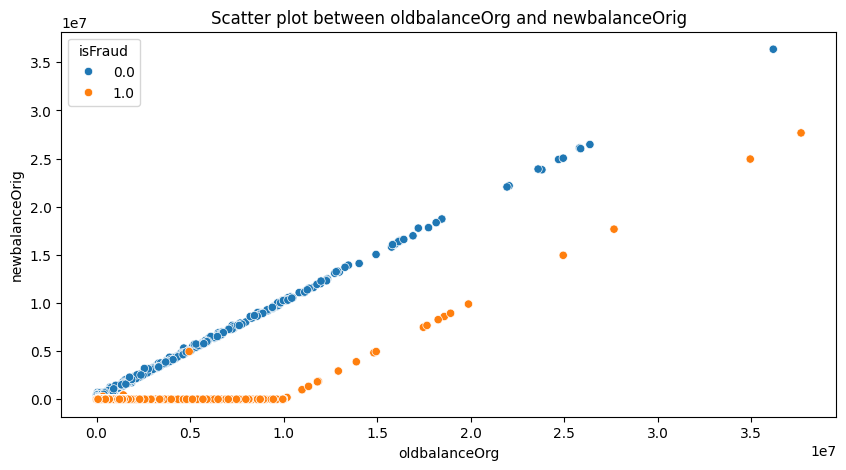

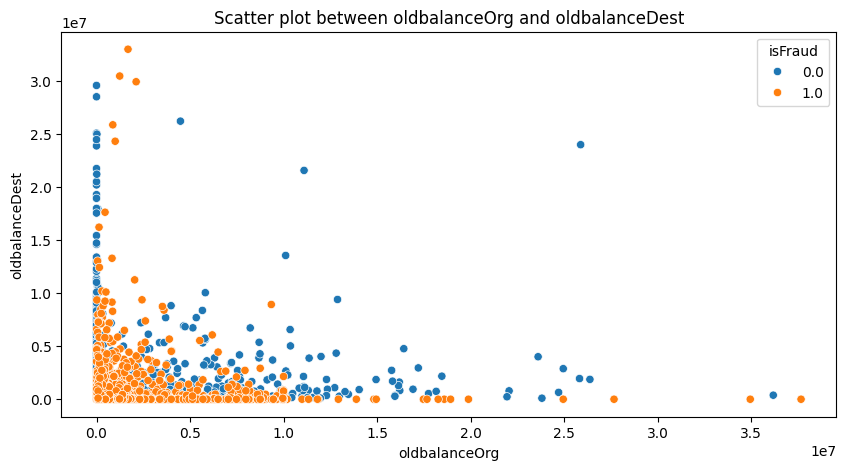

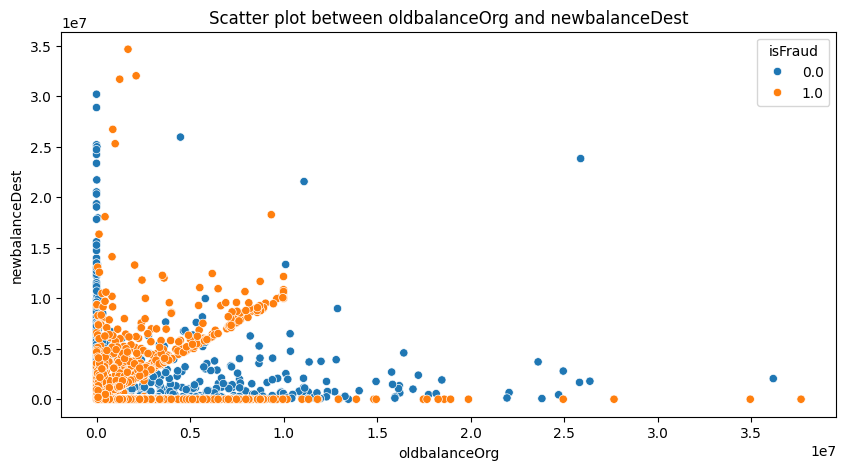

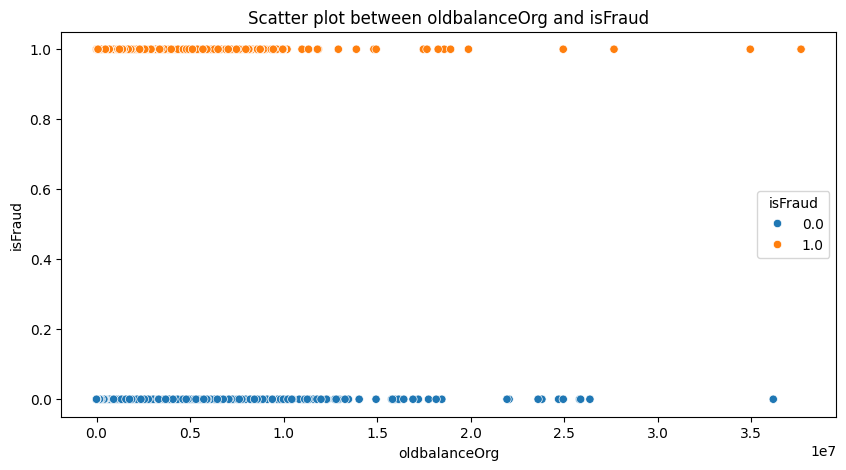

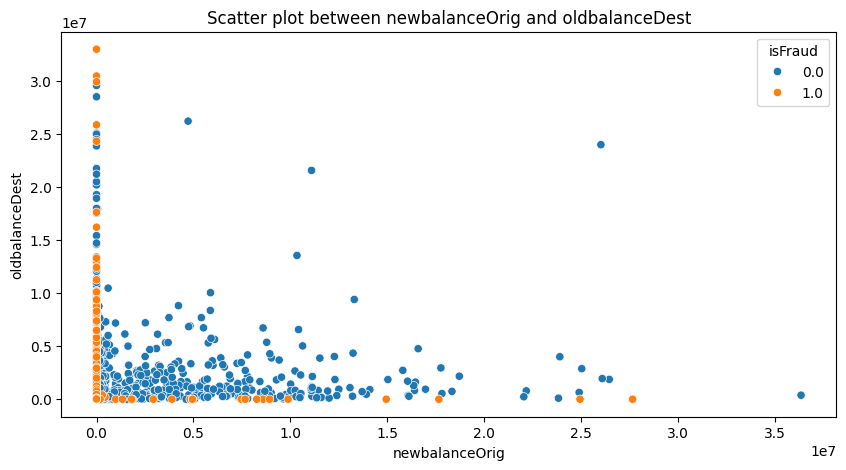

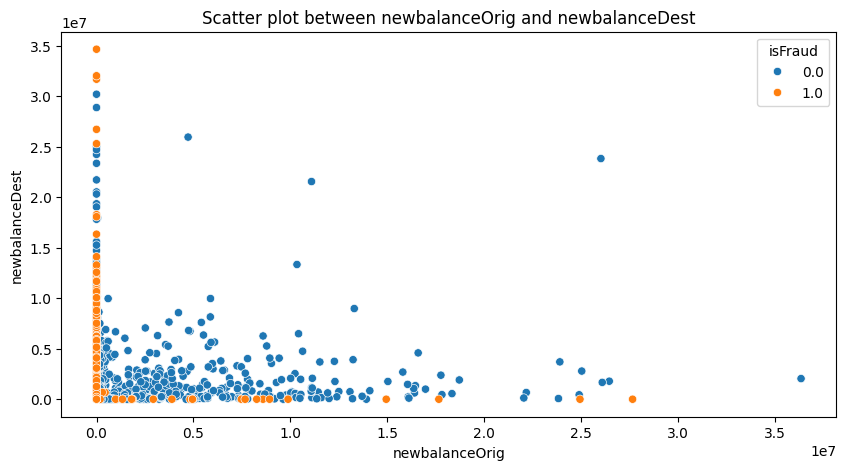

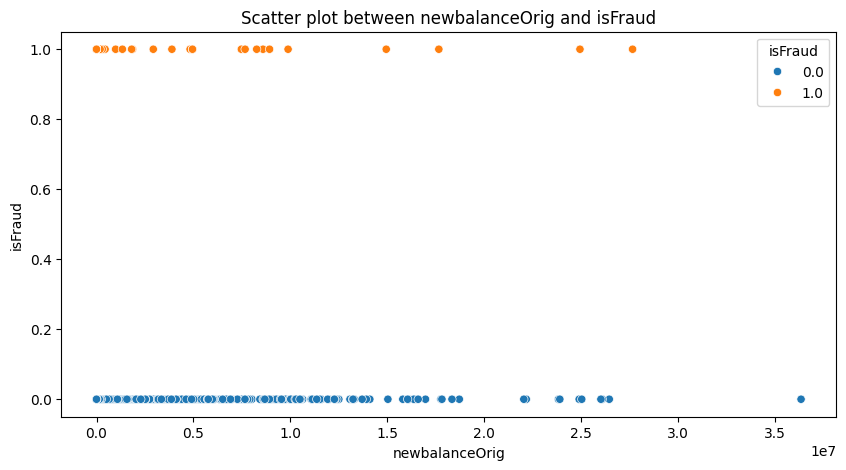

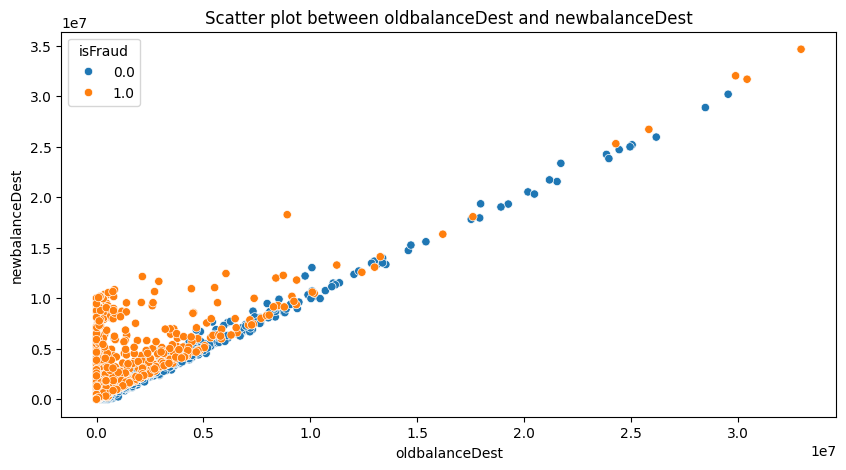

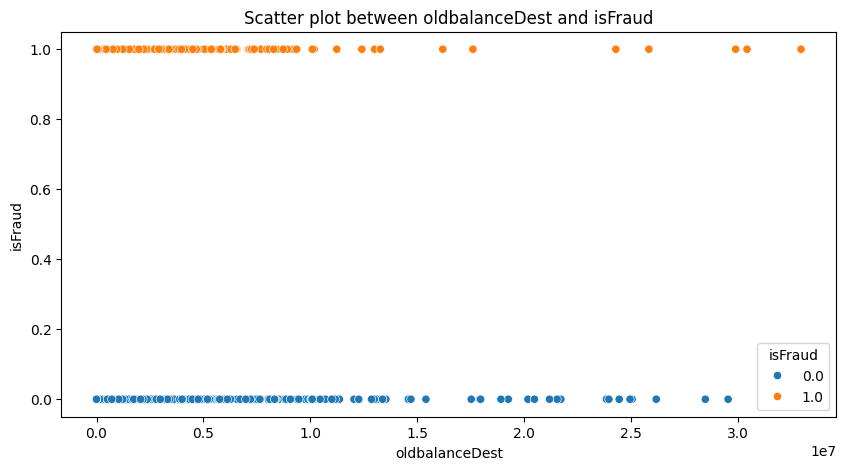

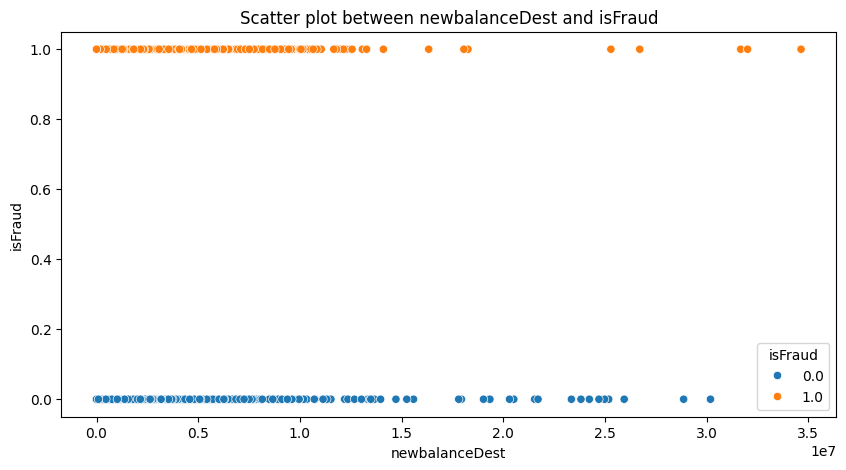

In [ ]:
# Scatter plots for numerical features
print("\nPlotting scatter plots for numerical features...")
numerical_columns = df.select_dtypes(include=[np.number]).columns
for i in range(len(numerical_columns) - 1):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=df[numerical_columns[i]], y=df[numerical_columns[j]], hue=df['isFraud'])
        plt.title(f'Scatter plot between {numerical_columns[i]} and {numerical_columns[j]}')
        plt.show()
# The scatter plots visualize the relationships between numerical features with respect to the target variable (isFraud).

From the Above Scatter Plot we can derive that Certain combinations of features may reveal patterns that distinguish fraudulent from non-fraudulent transactions. These patterns can guide feature engineering and model development

>>>>>>>

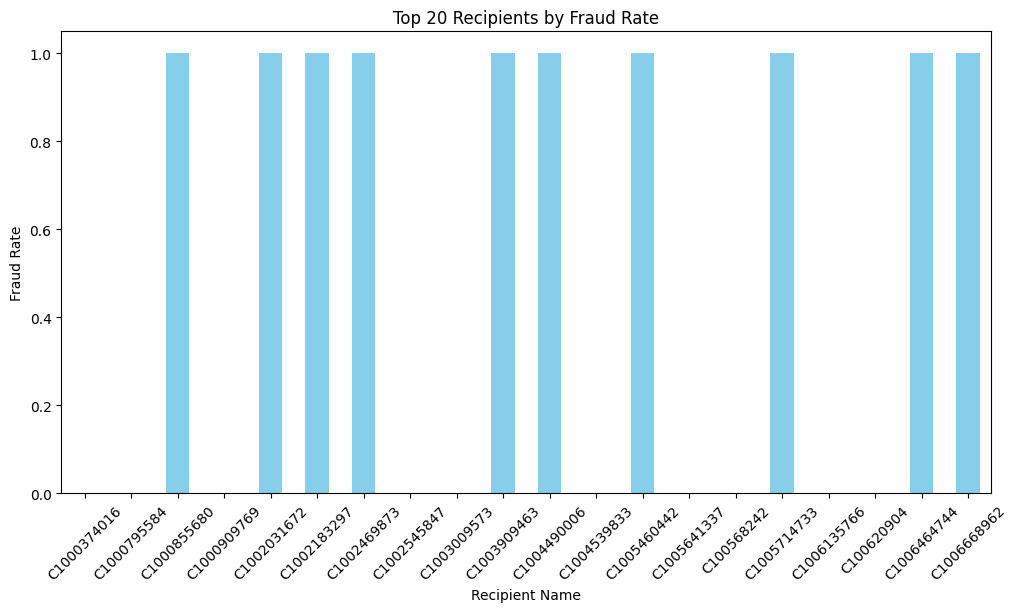

In [32]:
# Bar plot for the Top Recipients by Fraud Rate
fraud_rate_by_dest = df.groupby('nameDest')['isFraud'].mean()
plt.figure(figsize=(12, 6))
fraud_rate_by_dest.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Recipients by Fraud Rate')
plt.xlabel('Recipient Name')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

Feature Importance using Random forest Classifier

In [33]:
# Separating features and target variable
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [34]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [35]:
# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Leave the remaining columns unchanged
)

In [36]:
# Define the Random Forest model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [37]:
# Train the model
model.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  Index(['type', 'nameOrig', 'nameDest'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [38]:
# Extract feature importances from the trained model
importances = model.named_steps['classifier'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

In [39]:
# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

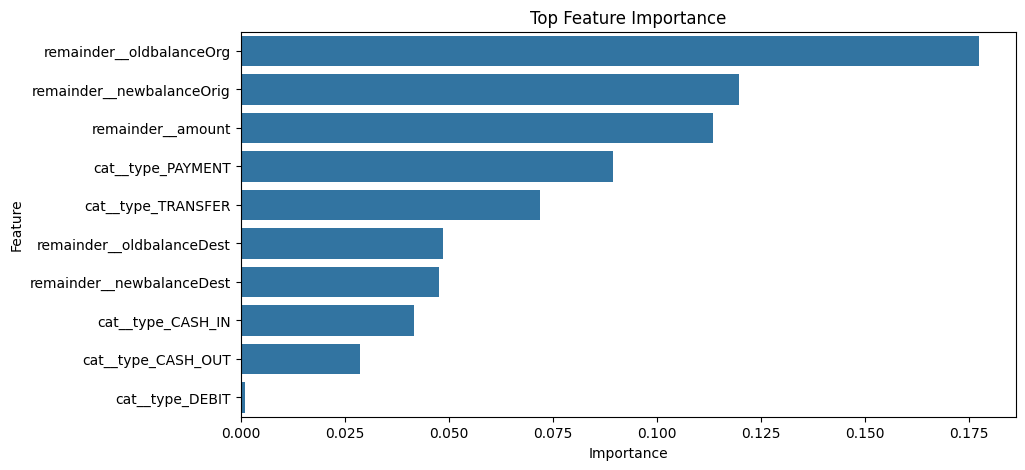

In [40]:
# Display top N Fraud Indicating features
N = 10
top_features = importance_df.head(N)

# Plot top feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('top_feature_importance.png')
plt.show()

From the above Feature importance we can derive that Features such as:-

1.oldbalanceOrg: Most important feature indicating high significance in predicting fraud.

2.amount: Transaction amount plays a crucial role in detecting fraudulent activities.

3.type_TRANSFER: High indication that transfer transactions are often fraudulent.

4.newbalanceOrig: Significant factor for identifying fraud.

5.type_PAYMENT: Some relevance in fraud detection.

6.oldbalanceDest: Important feature, though less significant than others.

7.newbalanceDest: Plays a role but less crucial than old balance.

8.type_CASH_IN and type_CASH_OUT: Moderate relevance in detecting fraud.

9.type_DEBIT: Least important in predicting fraudulent activities

>>>>>>

Summary of thid Project-->>>>



Project Overview: This project involves the analysis and visualization of a dataset containing information about fraudulent and non-fraudulent transactions. The main steps include:

1.Importing Libraries:
    Necessary libraries for data manipulation, visualization, and machine learning are imported.

2.Loading the Dataset:
    *The dataset balanced_dataset_50_50.csv is loaded, and its initial few rows are displayed.

3.Basic Information and Statistics:
    *Basic information such as data types, number of entries, summary statistics, and missing values are displayed.

4.Visualizations:

    *Histograms: Histograms for all numerical features to understand their distributions.

    *Correlation Matrix: A heatmap to visualize correlations between numerical features.

    *Box Plots: Box plots to check for outliers in numerical features.

    *Count Plot: Count plot of fraudulent vs. non-fraudulent transactions.

    *Pairplot: Pairplot to visualize pairwise relationships between features.

    *Bar Plots: Bar plots for categorical variables to compare distributions across fraudulent and non-fraudulent transactions.

    *Distribution Plots: Distribution plots for numerical features to highlight their spread and central tendencies.

    *Scatter Plots: Scatter plots to visualize relationships between numerical features with respect to the target variable (isFraud).

5.Data Preparation:

    *Separating Features and Target: Features (X) and target variable (y) are separated.

    *One-Hot Encoding: Categorical columns are identified and encoded using one-hot encoding.

6.Model Building:

    *Random Forest Classifier: A machine learning pipeline is created using a Random Forest Classifier.

    *Model Training: The model is trained on the dataset.

7.Feature Importance:

    *Extracting Feature Importances: Feature importances are extracted from the trained model.

    *Plotting Feature Importances: A bar plot is created to show the relative importance of each feature in predicting fraudulent transactions.